In [47]:
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm
from BW import *
import sys
sys.setrecursionlimit(1000000)
from IPython.display import Image
import numpy as np
from HMMCRN import *
import crnsimulator

In [82]:
gen_model = hmm.CategoricalHMM(n_components=2, random_state=2)

gen_model.startprob_ = np.array([1, 0])

gen_model.transmat_ = np.array([[0.95, 0.05],
                                [0.25, 0.75]])

gen_model.emissionprob_ = \
    np.array([[1 / 3, 1 / 3, 1 / 3],
              [0.01, 0.01, 0.98]])

rolls, gen_states = gen_model.sample(300)

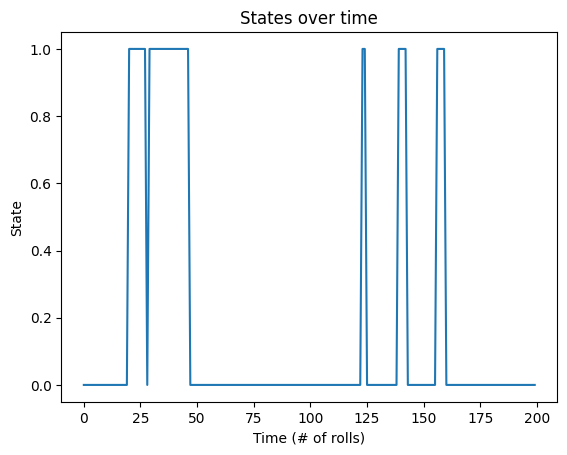

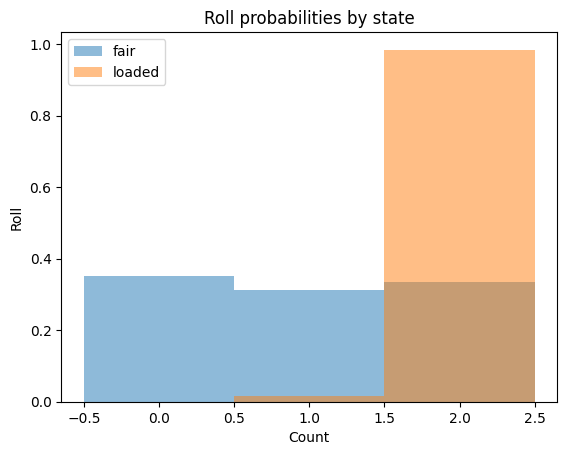

In [84]:
fig, ax = plt.subplots()
ax.plot(gen_states[:200])
ax.set_title('States over time')
ax.set_xlabel('Time (# of rolls)')
ax.set_ylabel('State')
plt.show()

# plot rolls for the fair and loaded states
fig, ax = plt.subplots()
ax.hist(rolls[gen_states == 0], label='fair', alpha=0.5,
        bins=np.arange(4) - 0.5, density=True)
ax.hist(rolls[gen_states == 1], label='loaded', alpha=0.5,
        bins=np.arange(4) - 0.5, density=True)
ax.set_title('Roll probabilities by state')
ax.set_xlabel('Count')
ax.set_ylabel('Roll')
ax.legend()
plt.show()

In [85]:
from sklearn.utils.validation import check_random_state
def normalize(a, axis=None):
    a_sum = a.sum(axis)
    if axis and a.ndim > 1:
        # Make sure we don't divide by zero.
        a_sum[a_sum == 0] = 1
        shape = list(a.shape)
        shape[axis] = 1
        a_sum.shape = shape

    a /= a_sum
X_train = rolls[:rolls.shape[0] // 2]
X_validate = rolls[rolls.shape[0] // 2:]

# check optimal score
gen_score = gen_model.score(X_validate)

best_score = best_model = None
n_fits = 50
np.random.seed(14)
for idx in range(n_fits):
    model = hmm.CategoricalHMM(
        n_components=2, random_state=idx,
        init_params='') 
    model.transmat_ = np.array([np.random.dirichlet([0.9, 0.1]),
                                np.random.dirichlet([0.1, 0.9])])
    random_state = check_random_state(model.random_state)
    model.startprob_=np.array([0.6,0.4])
    model.emissionprob_ =random_state.rand(
                model.n_components, 3)
    normalize(model.emissionprob_, axis=1)
    ites=model.n_iter
    sT0=model.startprob_
    sTT=model.transmat_
    sT1=model.emissionprob_
    model.fit(X_train)
    score = model.score(X_validate)
    print(f'Model #{idx}\tScore: {score}')
    if best_score is None or score > best_score:
        best_model = model
        best_score = score
        bT0=sT0
        bTT=sTT
        bT1=sT1
        bestid=idx

print(f'Generated score: {gen_score}\nBest score:      {best_score}')
print("Best Model:",bestid)
print(bT0.round(3))
print(bTT.round(3))
print(bT1.round(3))
print(best_model.startprob_.round(3))
print(best_model.transmat_.round(3))
print(best_model.emissionprob_.round(3))


# use the Viterbi algorithm to predict the most likely sequence of states
# given the model
states = best_model.predict(rolls)

Model #0	Score: -156.59542933573195
Model #1	Score: -152.38068102181944
Model #2	Score: -147.9379593323827
Model #3	Score: -149.82941747908632
Model #4	Score: -154.88545102633816
Model #5	Score: -154.88984547009323
Model #6	Score: -147.8329684138145
Model #7	Score: -148.58910081645033
Model #8	Score: -151.24750462497838
Model #9	Score: -156.59395679142065
Model #10	Score: -147.90591872854012
Model #11	Score: -148.0753025948983
Model #12	Score: -153.62349553664183
Model #13	Score: -165.0094064274403
Model #14	Score: -148.021359801712
Model #15	Score: -163.9794250762002
Model #16	Score: -154.89024623272036
Model #17	Score: -147.95979108777706
Model #18	Score: -152.40871087741974
Model #19	Score: -147.80631745143737
Model #20	Score: -147.98874931115137
Model #21	Score: -147.85208248868977
Model #22	Score: -150.84772989775396
Model #23	Score: -156.59398542445672
Model #24	Score: -147.99085262046873
Model #25	Score: -156.5939821403862
Model #26	Score: -150.72560913133069
Model #27	Score: -1

In [86]:
best_model.monitor_

ConvergenceMonitor(
    history=[-200.7086480619333, -152.83287164300214, -151.53349459320805, -150.87248124023156, -150.4623854674569, -150.21531671057357, -150.0692951301658, -149.98014828555165, -149.92157911668755, -149.8798829048854],
    iter=10,
    n_iter=10,
    tol=0.01,
    verbose=False,
)

-225.16067708296015
[0.6 0.4]
[[1.    0.   ]
 [0.357 0.643]]
[[0.088 0.688 0.223]
 [0.25  0.6   0.15 ]]
-215.2166067805493


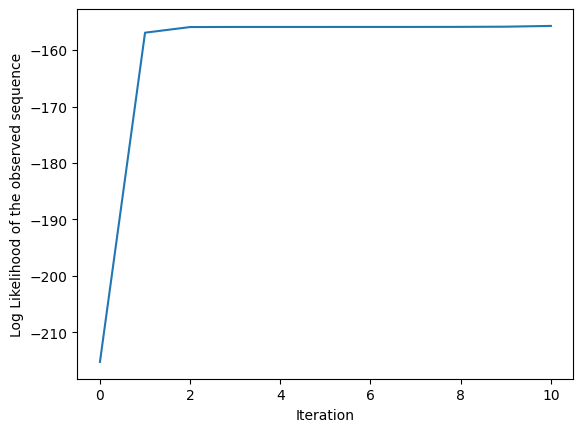

-155.72836427544757
Final Probabilities
[0. 1.]
[[0.999 0.001]
 [0.057 0.943]]
[[0.256 0.25  0.494]
 [0.447 0.49  0.063]]


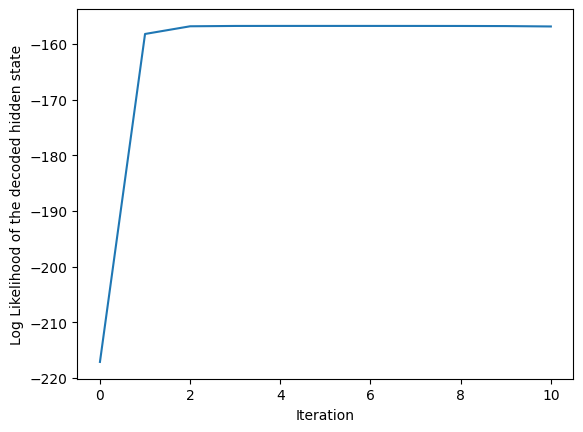

In [87]:
model = hmm.CategoricalHMM(
        n_components=2, random_state=bestid,
        init_params='')  # don't init transition, set it below
model.transmat_ = np.array([np.random.dirichlet([0.9, 0.1]),
                            np.random.dirichlet([0.1, 0.9])])
model.startprob_=bT0
model.emissionprob_=bT1
score = model.score(X_validate)
print(score)
Lll=BWlib2(model.startprob_,model.transmat_,model.emissionprob_,X_train,11)

In [6]:
#Using CRN for the same problem

In [88]:
R=HMMCRN(['H1','H2'],['V1','V2','V3'])
R.Ob=X_train
Tr=R.EM(1)
RG=crnsimulator.ReactionGraph(Tr)

In [89]:
%%time
filename,odename=RG.write_ODE_lib(filename='CasinoDetectorReaction.py')

CPU times: user 2min 29s, sys: 890 ms, total: 2min 30s
Wall time: 2min 31s


In [91]:
n=2
m=3
l=len(X_train)
I=ran_init(n,m,X_train.T[0])
start=init_simulator(n,m,l,I,'CasinoDetectorReaction.py')

In [92]:
%%time
!pypy/bin/pypy CasinoDetectorReaction.py --a 1e-3 --r 1e-3 --t8 0.05 --t-lin 100 --nxy>103.dat

CPU times: user 54.9 ms, sys: 24.1 ms, total: 79.1 ms
Wall time: 3.81 s


CRN initialization
Starting Prob:
 [0.83379125 0.16620875]
Transition:
 [[0.10430156 0.89569844]
 [0.01456763 0.98543237]]
Emission:
 [[0.12327319 0.07161    0.80511681]
 [0.07343782 0.88798297 0.03857922]]

CRN Equilibrium
Starting Prob:
 [0.803 0.197]
Transition:
 [[0.48  0.52 ]
 [0.435 0.565]]
Emission:
 [[0.282 0.23  0.488]
 [0.268 0.349 0.382]]


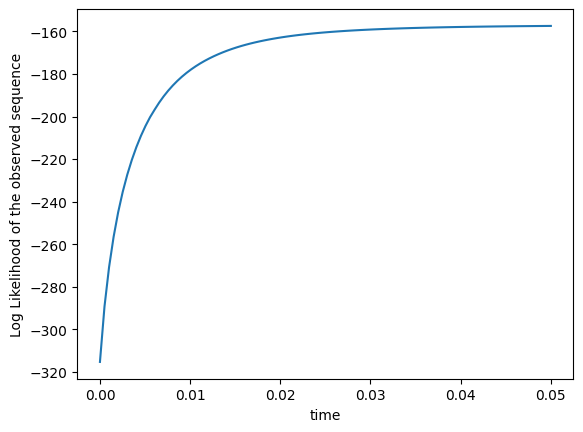

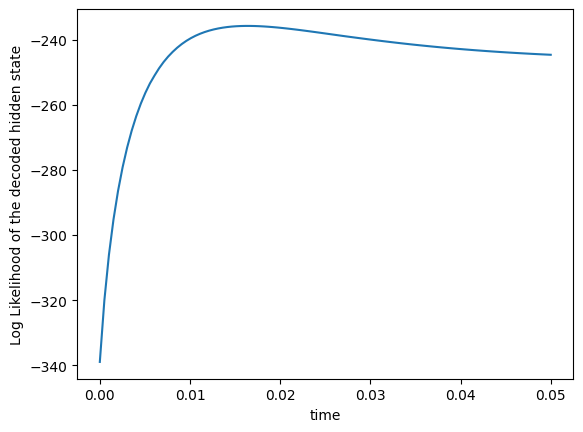

-157.43364221576772
CRN_Transition fit:
 [[0.481 0.519]
 [0.436 0.564]]
 
CRN_Emission fit:
 [[0.282 0.23  0.488]
 [0.269 0.349 0.383]]
[0.802 0.198]


In [93]:
Final=!tail -n 2 103.dat
Init=!head -n 2 103.dat
Y1=Init[0].split()[1:]
Y2=Final[0].split()[1:]
print_conc(start,Y1,Y2,n,m)
t1,c1L,c1T0,c1TT,c1T1=crn_Liklihood('103.dat',start,X_validate,n,m)
print(c1T0[-1].round(3))

[0.80227618 0.19772382]
[[0.4806222  0.5193778 ]
 [0.43567716 0.56432284]]
[[0.28203362 0.22977168 0.4881947 ]
 [0.26857804 0.3486597  0.38276226]]
-157.43364221576772


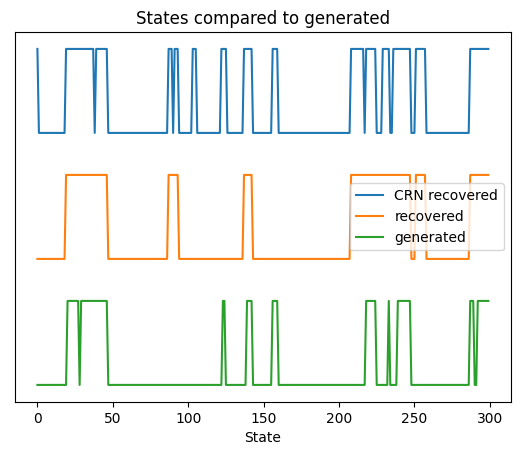

Start Generated:
[1 0]

Start Recovered:
[0. 1.]

CRN Start Recovered:
[0.802 0.198]


Transmission Matrix Generated:
[[0.95 0.05]
 [0.25 0.75]]

Transmission Matrix Recovered:
[[0.891 0.109]
 [0.045 0.955]]

CRN Transmission Matrix Recovered:
[[0.481 0.519]
 [0.436 0.564]]


Emission Matrix Generated:
[[0.333 0.333 0.333]
 [0.01  0.01  0.98 ]]

Emission Matrix Recovered:
[[0.028 0.081 0.891]
 [0.381 0.36  0.259]]

CRN Emission Matrix Recovered:
[[0.282 0.23  0.488]
 [0.269 0.349 0.383]]




In [94]:
crn_model = hmm.CategoricalHMM(
        n_components=2,
        init_params='')
crn_model.startprob_=c1T0[-1]
crn_model.transmat_=c1TT[-1]
crn_model.emissionprob_=c1T1[-1]

print(crn_model.startprob_)
print(crn_model.transmat_)
print(crn_model.emissionprob_)
score = crn_model.score(X_validate)
print(score)
crn_states = crn_model.predict(rolls)
fig, ax = plt.subplots()
ax.plot(1-crn_states[:500] + 3.0, label='CRN recovered')
ax.plot(1-states[:500] + 1.5, label='recovered')
ax.plot(gen_states[:500], label='generated')
ax.set_yticks([])
ax.set_title('States compared to generated')
ax.set_xlabel('Time (# rolls)')
ax.set_xlabel('State')
ax.legend()
plt.show()

print(f'Start Generated:\n{gen_model.startprob_.round(3)}\n\n'
      f'Start Recovered:\n{best_model.startprob_.round(3)}\n\n'
      f'CRN Start Recovered:\n{crn_model.startprob_.round(3)}\n\n')



print(f'Transmission Matrix Generated:\n{gen_model.transmat_.round(3)}\n\n'
      f'Transmission Matrix Recovered:\n{best_model.transmat_.round(3)}\n\n'
      f'CRN Transmission Matrix Recovered:\n{crn_model.transmat_.round(3)}\n\n')


print(f'Emission Matrix Generated:\n{gen_model.emissionprob_.round(3)}\n\n'
      f'Emission Matrix Recovered:\n{best_model.emissionprob_.round(3)}\n\n'
      f'CRN Emission Matrix Recovered:\n{crn_model.emissionprob_.round(3)}\n\n')
